MSE on testing data: 1382.2364170029805
MAE on testing data: 10.802287339712947
Total arrival delays: 4476178.844033605


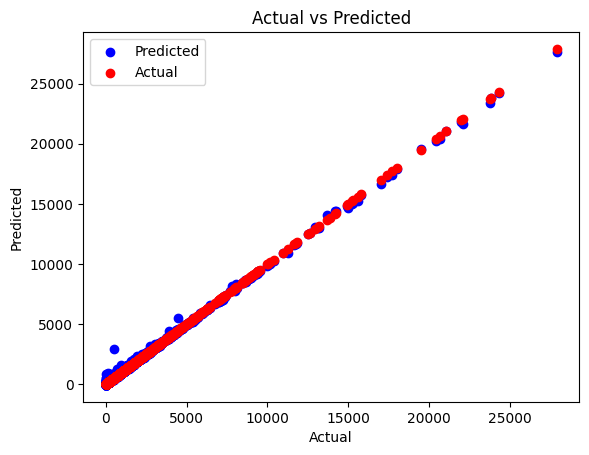

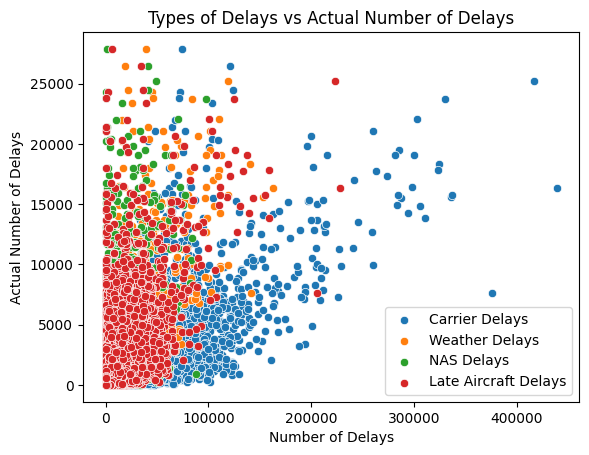

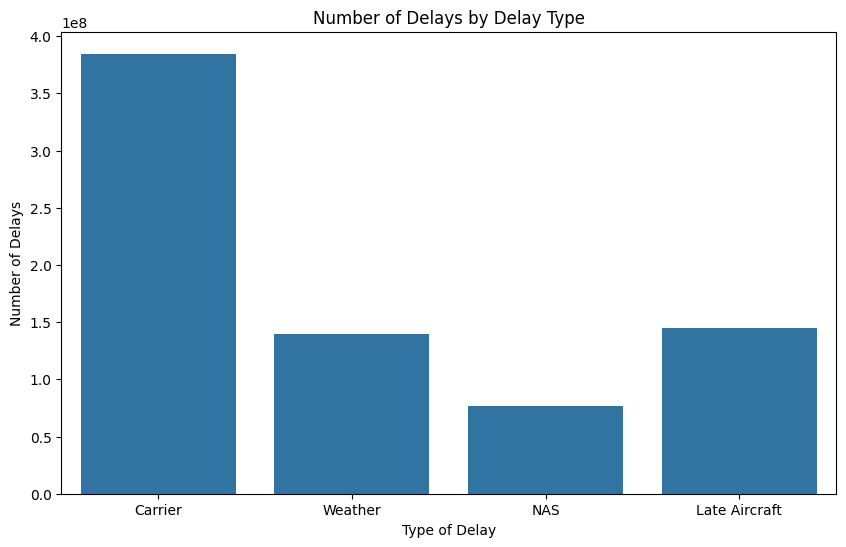

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

carrier_mapping = {
    "Endeavor Air Inc.": 1,
    "American Airlines Inc.": 2,
    "Alaska Airlines Inc.": 3,
    "JetBlue Airways": 4,
    "Delta Air Lines Inc.": 5,
    "Frontier Airlines Inc.": 6,
    "Allegiant Air": 7,
    "Hawaiian Airlines Inc.": 8,
    "Envoy Air": 9,
    "Spirit Air Lines": 10,
    "PSA Airlines Inc.": 11,
    "SkyWest Airlines Inc.": 12,
    "United Air Lines Inc.": 13,
    "Southwest Airlines Co.": 14,
    "Republic Airline": 15
}

airport_mapping = {
    "DTW": 2, "AUS": 3, "MSY": 4, "RDU": 5, "PIT": 6, "ATL": 7, "MCI": 8, "DCA": 9, "MSP": 10, "BNA": 11,
    "CLE": 12, "BOS": 13, "PHL": 14, "IND": 15, "ORD": 16, "BWI": 17, "LAX": 18, "LGA": 19, "DFW": 20, "PHX": 21,
    "SAN": 22, "STL": 23, "CHS": 24, "CLT": 25, "PDX": 26, "EWR": 27, "OMA": 28, "JAX": 29, "CMH": 30, "DEN": 31, 
    "RIC": 32, "SEA": 33, "BDL": 34, "IAH": 35, "IAD": 36, "ABQ": 37, "SAT": 38, "MEM": 39, "DSM": 40, "MKE": 41, 
    "SFO": 42, "SLC": 43, "OKC": 44, "BUF": 45, "MCO": 46, "ORF": 47, "TPA": 48, "SMF": 49, "CVG": 50, 
    "FLL": 51, "RSW": 52, "LAS": 53, "GRR": 54, "SYR": 55, "TUL": 56, "SDF": 57, "SJC": 58, "ALB": 59, "SAV": 60, 
    "PBI": 61, "RNO": 62, "ICT": 63, "PWM": 64, "SNA": 65, "ELP": 66, "JFK": 67, "LIT": 68, "ONT": 69, "TUS": 70, 
    "GSP": 71, "MSN": 72, "BOI": 73, "PNS": 74, "GEG": 75, "BHM": 76, "MIA": 77, "ROC": 78, "PSP": 79, "MDT": 80, 
    "SJU": 81, "SRQ": 82, "BZN": 83, "TYS": 84, "FSD": 85, "MYR": 86, "PVD": 87, "CID": 88, "DAY": 89, "GSO": 90, 
    "OAK": 91, "BTV": 92, "BUR": 93, "HNL": 94, "OGG": 95, "KOA": 96, "AVL": 97, "LEX": 98, "VPS": 99, "LIH": 100, 
    "FAR": 101, "HSV": 102, "COS": 103, "HOU": 104, "STT": 105, "CHA": 106, "XNA": 107, "ILM": 108, "BIL": 109, "TVC": 110, 
    "MAF": 111, "BTR": 112, "JAN": 113, "FAT": 114, "RAP": 115, "MFE": 116, "GRB": 117, "SHV": 118, "LBB": 119, "ANC": 120, 
    "ECP": 121, "FNT": 122, "CAE": 123, "LFT": 124, "BMI": 125, "MDW": 126, "JAC": 127, "SGF": 128, "CAK": 129, "ATW": 130, 
    "AMA": 131, "GPT": 132, "EYW": 133, "PIA": 134, "BIS": 135, "TLH": 136, "CRP": 137, "MOB": 138, "MTJ": 139, "ABE": 140, 
    "EVV": 141, "SBA": 142, "HRL": 143, "LGB": 144, "HPN": 145, "BGR": 146, "FCA": 147, "DAL": 148, "CHO": 149, "TRI": 150, 
    "MHT": 151, "MSO": 152, "GNV": 153, "FWA": 154, "SBN": 155, "AGS": 156, "EUG": 157, "MLI": 158, "GJT": 159, "AVP": 160, 
    "FAY": 161, "LAN": 162, "MGM": 163, "STX": 164, "HDN": 165, "BQN": 166, "RST": 167, "ROA": 168, "MRY": 169, "CRW": 170, 
    "EGE": 171, "DAB": 172, "MFR": 173, "BRO": 174, "LRD": 175, "FAI": 176, "ROC": 177, "PVD": 178, "DRO": 179, "AEX": 180, 
    "CWA": 181, "PSC": 182, "MOT": 183, "AZO": 184, "ITO": 185, "MLU": 186, "LAS": 187, "SPI": 188, "FSM": 189, "DLH": 190, 
    "GRK": 191, "LNK": 192, "GTF": 193, "OAJ": 194, "CLL": 195, "RDM": 196, "SWF": 197, "SBP": 199, "GFK": 200, 
    "PHF": 201, "IDA": 202, "SAF": 203, "BFL": 204, "OAK": 205, "LCH": 206, "LSE": 207, "SCE": 208, "STS": 209, "MLB": 210, 
    "MBS": 211, "GUC": 212, "ISP": 213, "COU": 214, "BLI": 215, "MQT": 216, "GRI": 217, "JNU": 218, "PBG": 219, "LAW": 220, 
    "ELM": 221, "MHK": 222, "SJT": 223, "YUM": 224, "ORH": 225, "SIT": 226, "KTN": 227, "FLG": 228, "CSG": 229, "MHT": 230, 
    "TYR": 231, "HLN": 232, "EWN": 233, "SUN": 234, "IAG": 235, "ROA": 236, "ASE": 237, "ERI": 238, "RDD": 239, "TOL": 240, 
    "DHN": 241, "BPT": 242, "JLN": 243, "GTR": 244, "PSE": 245, "ACT": 246, "MSO": 247, "CKB": 248, "ABI": 249, "SPS": 250, 
    "SCC": 251, "TTN": 252, "SGU": 253, "CPR": 254, "ABY": 255, "BQK": 256, "ROW": 257, "VLD": 258, "RKS": 259, "TXK": 260, 
    "OME": 261, "PIH": 262, "HIB": 263, "OTH": 264, "BET": 265, "GUM": 266, "EKO": 267, "PSG": 268, "BTM": 269, "BRD": 270, 
    "CMX": 271, "ABR": 272, "TWF": 273, "BJI": 274, "RHI": 275, "CDV": 276, "INL": 277, "ACV": 278, "ADK": 279, "IMT": 280, 
    "YAK": 281, "LAR": 282, "WRG": 283, "BRW": 284, "OTZ": 285, "ADQ": 286, "LWS": 287, "APN": 288, "GCK": 289, "CDC": 290, 
    "GGG": 291, "PLN": 292, "CIU": 293, "MLI": 294, "PAH": 295, "ACY": 296, "ACK": 297, "EAU": 298, "HOB": 299, "SUX": 300, 
    "JMS": 301, "DVL": 302, "COD": 303, "MKG": 304, "ESC": 305, "HYS": 306, "ISN": 307, "HHH": 308, "PIB": 309, "SMX": 310, 
    "BGM": 311, "MEI": 312, "PPG": 313, "CRW": 314, "LBE": 315, "ALO": 316, "MVY": 317, "CMI": 318, "GCC": 319, "ITH": 320, 
    "HTS": 321, "DBQ": 322, "DIK": 323, "PUB": 324, "VEL": 325, "PSM": 326, "PGD": 327, "PAE": 328, "MLB": 329, "BFF": 330, 
    "RFD": 331, "SWO": 332, "STC": 333, "LCK": 334, "AZA": 335, "HGR": 336, "SFB": 337, "PVU": 338, "PIE": 339, "OGS": 340, 
    "USA": 341, "LBL": 342, "LBF": 343, "SPN": 344, "SLN": 345, "DLG": 346, "OWB": 347, "PRC": 348, "AKN": 349, "CGI": 350, 
    "CNY": 351, "TOL": 352, "SHD": 353, "LWB": 354, "BKG": 355, "WYS": 356, "DRT": 357, "OGD": 358, "SCK": 359, "EAR": 360, 
    "LYH": 361, "HVN": 362, "XWA": 363, "ROW": 364, "SHR": 365, "BLV": 366, "DDC": 367, "CYS": 368, "DEC": 369, "MMH": 370, 
    "ILG": 371, "PIR": 372, "HYA": 373, "VCT": 374, "ATY": 375, "GST": 376, "RIW": 377, "JST": 378, "UST": 379, "FOD": 380, 
    "MCW": 381, "ALW": 382, "ITH": 383, "UIN": 384, "SCK": 385, "YKM": 386, "EAT": 387, "BLV": 388, "GCC": 389, "PUW": 390, 
    "PGV": 391, "CLD": 392, "CEC": 393, "CNY": 394, "ALS": 395, "CIC": 396, "MFE": 397, "CDB": 398, "ART": 399, "BIH": 400, 
    "IFP": 401, "TBN": 402, "BFM": 403, "RIW": 404, "MOD": 405, "LMT": 406, "HYA": 407, "MQT": 408,  "FOE": 409, "FLO": 410, 
    "RDD": 411, "IYK": 412, "IPT": 413, "ENV": 414, "TKI": 415, "FNL": 416, "EFD": 417, "BFM": 418, "YNG": 419, "MCN": 420
}

# Read CSV file
df = pd.read_csv("Data2.csv", skiprows=[1])

# Convert carrier and airport names to numerical values
df['Carrier'] = df['Carrier'].map(carrier_mapping)
df['Airport'] = df['Airport'].map(airport_mapping)

# Preprocess data
X = df[['Year', 'Month', 'Carrier', 'Airport', 'Arriving Flights', 'Carrier Delays', 'Weather Delays', 'NAS Delays', 'Late Aircraft Delays']]
y = df['Arrival Delays']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Feature Engineering: Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Feature Selection: Select features based on importance
selector = SelectFromModel(LinearRegression())
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

# Fit the model on the original scaled data (without polynomial features)
model = LinearRegression()

model.fit(X_train_scaled, y_train)

# Get feature names after one-hot encoding
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Fit the model on the selected features
model.fit(X_train_selected, y_train)

# Calculate MSE and MAE for testing data using the original scaled data
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE on testing data:", mse)
print("MAE on testing data:", mae)

# Output total arrival delays
total_arrival_delays = y_pred.sum()
print("Total arrival delays:", total_arrival_delays)

plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

for column in ['Carrier Delays', 'Weather Delays', 'NAS Delays', 'Late Aircraft Delays']:
    sns.scatterplot(x=df[column], y=df['Arrival Delays'], label=column)

plt.xlabel('Number of Delays')
plt.ylabel('Actual Number of Delays')
plt.title('Types of Delays vs Actual Number of Delays')
plt.legend()
plt.show()
